In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel('Puntos_2014_2023.xlsx')
df

,LONGITUD,LATITUD,anio
0,-73.78582,6.3951,2014
1,-73.56229,9.28149,2014
2,-73.81157,8.79683,2014
3,-76.93335,0.43505,2014
4,-74.51280,4.47092,2014
...,...,...,...
1947,-77.50305,1.56446,2023
1948,-76.31681,2.771595,2023
1949,-75.80974,9.300973,2023
1950,-76.54520,2.41877,2023


In [ ]:
print(df.columns)

Index(['LONGITUD ', 'LATITUD ', 'anio'], dtype='object')


In [ ]:
import pandas as pd
import pyproj
from pyproj import Transformer
import folium


In [ ]:
df['LATITUD '] = pd.to_numeric(df['LATITUD '], errors='coerce')
df['LONGITUD '] = pd.to_numeric(df['LONGITUD '], errors='coerce')


In [ ]:
# Eliminar filas con valores faltantes en las coordenadas
df = df.dropna(subset=['LATITUD ', 'LONGITUD '])

In [ ]:
import folium

# Crear el mapa centrado en Colombia
mapa = folium.Map(location=[4.570868, -74.297333], zoom_start=6)

# Añadir los marcadores al mapa
for i, row in df.iterrows():
    folium.Marker(
        location=[row['LATITUD '], row['LONGITUD ']],
        icon=folium.Icon(color="purple")
    ).add_to(mapa)

# Mostrar el mapa
mapa



In [ ]:
from scipy.spatial.distance import pdist, squareform

# Calcular las distancias euclidianas entre todos los pares de puntos
distances = pdist(df[['LONGITUD ', 'LATITUD ']], metric='euclidean')

# Convertir las distancias en una matriz cuadrada (distancia entre cada par de puntos)
distance_matrix = squareform(distances)


In [ ]:
# Definir un umbral de distancia (por ejemplo, 0.1 unidades de distancia)
umbral_distancia = 0.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
wcss = []
max_k = 10  # máximo número de clusters a probar

for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)  # ajustar el modelo K-means a los datos
    wcss.append(kmeans.inertia_)  # inertia_ contiene el WCSS

# Mostrar los valores de WCSS
print(wcss)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[204356788983545.22, 27167959362564.277, 1860212181210.9204, 651145255588.4258, 1377801968.2165096, 18662207.88317467, 53154.883174645314, 30320.48522889184, 20072.966664684936, 12179.33643256978]


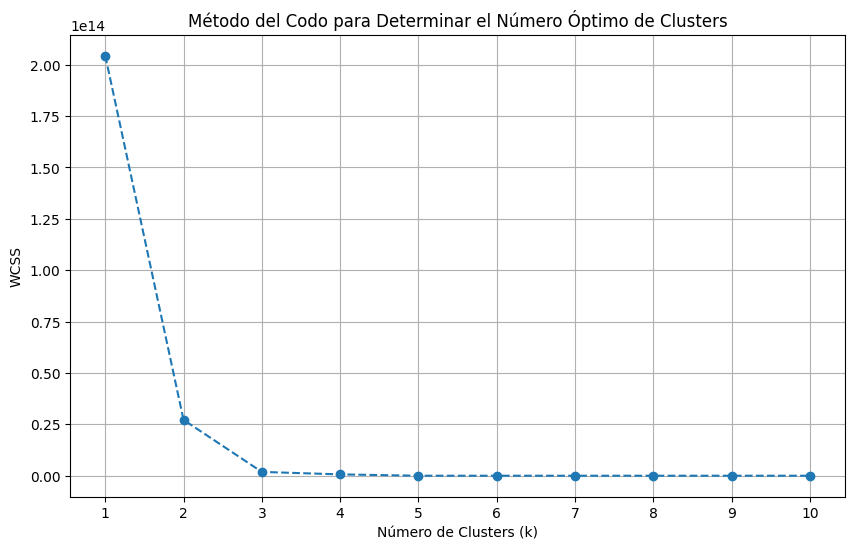

In [ ]:
# Graficar la curva del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(np.arange(1, max_k + 1, 1))
plt.grid(True)
plt.show()


In [55]:
from sklearn.cluster import KMeans

n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['label'] = kmeans.fit_predict(df[['LONGITUD ', 'LATITUD ']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-55-58323713cc26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = kmeans.fit_predict(df[['LONGITUD ', 'LATITUD ']])


In [62]:
df

,LONGITUD,LATITUD,anio,label
0,-73.78582,6.395100,2014,7
1,-73.56229,9.281490,2014,0
2,-73.81157,8.796830,2014,0
3,-76.93335,0.435050,2014,9
4,-74.51280,4.470920,2014,7
...,...,...,...,...
1947,-77.50305,1.564460,2023,9
1948,-76.31681,2.771595,2023,9
1949,-75.80974,9.300973,2023,0
1950,-76.54520,2.418770,2023,9


In [65]:
df["label"]= df["label"].replace({0: "red", 1: "green", 2: "purple", 3: "orange", 4: 'yellow', 5:'cyan',6:'green',7: 'blue',8: 'black',9:'pink'})

<ipython-input-65-0babb705efd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]= df["label"].replace({0: "red", 1: "green", 2: "purple", 3: "orange", 4: 'yellow', 5:'cyan',6:'green',7: 'blue',8: 'black',9:'pink'})


In [67]:
mapa = folium.Map(location=[4.570868, -74.297333], zoom_start=6)

for i,row in df.iterrows():
    folium.Marker(location=[row['LATITUD '],row['LONGITUD ']],
    icon=folium.Icon(color=row["label"])).add_to(mapa)

mapa

<ipython-input-67-486fb4c9463c>:5: UserWarning: color argument of Icon should be one of: {'cadetblue', 'lightgray', 'blue', 'darkgreen', 'lightblue', 'white', 'orange', 'darkred', 'purple', 'gray', 'red', 'green', 'lightred', 'beige', 'darkblue', 'darkpurple', 'pink', 'black', 'lightgreen'}.
  icon=folium.Icon(color=row["label"])).add_to(mapa)


In [70]:
import pandas as pd
from sklearn.cluster import DBSCAN
import folium

In [71]:
# Configurar y ajustar el modelo DBSCAN
epsilon = 0.01  # Define la distancia máxima entre puntos para formar un cluster
min_samples = 2  # Define el número mínimo de puntos para formar un cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
df['cluster'] = dbscan.fit_predict(df[['LONGITUD ', 'LATITUD ']])


<ipython-input-71-99c4aa766331>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = dbscan.fit_predict(df[['LONGITUD ', 'LATITUD ']])


In [83]:

# Configurar y ajustar el modelo DBSCAN
epsilon = 0.8  # Define la distancia máxima entre puntos para formar un cluster
min_samples = 100  # Define el número mínimo de puntos para formar un cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
df['cluster'] = dbscan.fit_predict(df[['LONGITUD ', 'LATITUD ']])

# Obtener el número de clusters únicos identificados por DBSCAN
num_clusters = len(set(df['cluster'])) - (1 if -1 in df['cluster'] else 0)  # Excluye el cluster de ruido (-1)

# Colores para los clusters (puedes usar más colores si esperas más clusters)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Verificar si hay suficientes colores para todos los clusters identificados
if num_clusters > len(colors):
    raise ValueError(f"No hay suficientes colores definidos para {num_clusters} clusters. Define más colores.")

# Crear un mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[4.570868, -74.297333], zoom_start=6)


# Colorear los puntos según el cluster asignado por DBSCAN
for i, row in df.iterrows():
    cluster_color = colors[df.at[i, 'cluster']]
    folium.CircleMarker([row['LATITUD '], row['LONGITUD ']],
                        radius=5,
                        color=cluster_color,
                        fill=True,
                        fill_color=cluster_color,
                        fill_opacity=0.7,
                        popup=f'Cluster {row["cluster"]}'
                       ).add_to(mapa)

# Mostrar el mapa
mapa


Output hidden; open in https://colab.research.google.com to view.

In [84]:
df

,LONGITUD,LATITUD,anio,label,cluster
0,-73.78582,6.395100,2014,blue,0
1,-73.56229,9.281490,2014,red,-1
2,-73.81157,8.796830,2014,red,-1
3,-76.93335,0.435050,2014,pink,0
4,-74.51280,4.470920,2014,blue,0
...,...,...,...,...,...
1947,-77.50305,1.564460,2023,pink,0
1948,-76.31681,2.771595,2023,pink,0
1949,-75.80974,9.300973,2023,red,1
1950,-76.54520,2.418770,2023,pink,0


In [86]:
frecuencia = df['label'].value_counts()
frecuencia

label
blue      942
pink      523
red       478
green       2
cyan        1
orange      1
black       1
purple      1
yellow      1
Name: count, dtype: int64

In [87]:
frecuencia = df['cluster'].value_counts()
frecuencia

cluster
 0    1437
 1     188
-1     181
 2     144
Name: count, dtype: int64

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
import folium

In [96]:
# Configurar y ajustar el modelo OPTICS
optics = OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.1)
df['optics'] = optics.fit_predict(df[['LONGITUD ', 'LATITUD ']])

# Filtrar puntos de ruido (cluster = -1)
df_clean = df[df['optics'] != -1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
<ipython-input-96-ce7a49f60315>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['optics'] = optics.fit_predict(df[['LONGITUD ', 'LATITUD ']])


In [97]:
# Crear un mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[4.570868, -74.297333], zoom_start=6)

# Colorear los puntos según el cluster asignado por OPTICS
colors = ['red', 'green', 'blue', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

for i, row in df_clean.iterrows():
    cluster_color = colors[df.at[i, 'optics']]
    folium.CircleMarker([row['LATITUD '], row['LONGITUD ']],
                        radius=5,
                        color=cluster_color,
                        fill=True,
                        fill_color=cluster_color,
                        fill_opacity=0.7,
                        popup=f'Cluster {row["optics"]}'
                       ).add_to(mapa)

# Mostrar el mapa
mapa
